# Training model on cartography classes

I want to see whether selecting easy-to-learn, hard-to-learn or ambiguous data instances will omprove performance on our 2k curriculum as well.
Might make multiple curriculum with:
- an equal mix of the three groups
- just ambiguous 
- just hard-to-learn

Paper: Swayamdipta, et all. (2020). Dataset cartography: Mapping and diagnosing datasets with training dynamics. arXiv preprint arXiv:2009.10795.

## Importing the datasets
### Importing cartography data

In [1]:
import pandas as pd

cartography_data = pd.read_json('snli_roberta_0_6_data_map_coordinates.jsonl', lines=True)

In [2]:
print(len(cartography_data))
print(cartography_data) # 4804607632

549367
                 guid   index  confidence  variability  correctness
0       4446013212032       0    0.675678     0.301201            4
1        568940932410       1    0.843770     0.314807            5
2       4107496324431       2    0.864639     0.302112            5
3        151853983012       3    0.872000     0.154454            6
4       6041167176312       4    0.653921     0.342495            4
...               ...     ...         ...          ...          ...
549362  5732659631411  549362    0.997563     0.002784            6
549363  3920105265011  549363    0.994982     0.010534            6
549364  6888801884010  549364    0.936412     0.080370            6
549365   189022647122  549365    0.777098     0.066182            6
549366  4506417051031  549366    0.913720     0.081541            6

[549367 rows x 5 columns]


### Importing SNLI data

In [3]:
# if assigntools not yet downloaded run line
# ! git clone https://github.com/kovvalsky/assigntools.git

# if zip file of SNLI data not yet downloaded run lines
# !wget https://nlp.stanford.edu/projects/snli/snli_1.0.zip
# !unzip snli_1.0.zip

In [4]:
# original dataset from Stanford
data_snli = pd.read_json('snli_1.0/snli_1.0_train.jsonl', lines=True)
# data.columns = ["guid", "index", "confidence", "variability", "correctness"]
# print(data_snli["annotator_labels"])
print(data_snli.shape)

(550152, 10)


In [5]:
from assigntools.LoLa.read_nli import snli_jsonl2dict, sen2anno_from_nli_problems
from assigntools.LoLa.sen_analysis import spacy_process_sen2tok, display_doc_dep

In [7]:
# this is Lasha's code for downloading SNLI
SNLI, S2A = snli_jsonl2dict('snli_1.0') 
print(f"Length of the SNLI dataset with the wrong labels: {len(SNLI['train'])}")

Found .json files for ['dev', 'test', 'train'] parts
processing DEV:	

10000it [00:00, 18436.91it/s]


9842 problems read
0 problems have a wrong annotator label
processing TEST:	

10000it [00:00, 20132.64it/s]


9824 problems read
0 problems have a wrong annotator label
processing TRAIN:	

550152it [00:27, 20137.24it/s]


549169 problems read
198 problems have a wrong annotator label
Most common weird labels: //(198)
Length of the SNLI dataset with the wrong labels: 549169


In [8]:
# this is Lasha's code for downloading SNLI without cleaning the labels
SNLI_with_wrong, S2A = snli_jsonl2dict('snli_1.0', clean_labels=False)
print(f"Length of the clean SNLI dataset: {len(SNLI_with_wrong['train'])}")

Found .json files for ['dev', 'test', 'train'] parts
processing DEV:	

10000it [00:00, 23136.70it/s]


9842 problems read
0 problems have a wrong annotator label
processing TEST:	

10000it [00:00, 24160.83it/s]


9824 problems read
0 problems have a wrong annotator label
processing TRAIN:	

550152it [00:29, 18563.89it/s]


549367 problems read
198 problems have a wrong annotator label
Most common weird labels: //(198)
Length of the clean SNLI dataset: 549367


Have to find a way to match up the number of instances of the cartography data to the number of instances in the original SNLI dataset in order to match the ID's from the cartography values to the sentences to train the model on.
- The cartography dataset has *549367*
- The original SNLI dataset downloaded from Stanford or huggingface has *550152*
- From Lasha's code has *549169* with 198 with wrong annotater labels

This suggests that if we delete the instances with wrong annotated labels from the cartography dataset that the instances from the cartography dataset would match that of Lasha's processed dataset and we could match up the ID's of the two datasets.

Task:
- Check if the ID's of the two datasets (SNLI and cartography) match up. Can use the code in which they assign the ID's to the dataset.

In [9]:
# print(x for x in list(SNLI['train'].keys()) if x not in list(SNLI_with_wrong['train'].keys()))
wrong_keys = list(set(list(SNLI_with_wrong['train'].keys())).difference(list(SNLI['train'].keys())))
print(len(wrong_keys))

198


Now I need to be able to delete the wrong label ID's from the cartography dataset.\
For that first see how to link the ID's from the SNLI dataset to that of the cartography data.

In [11]:
from data_utils_glue import convert_string_to_unique_number

number_ID = convert_string_to_unique_number(wrong_keys[0])
print(number_ID) #5696581092010

5633423671111


In [12]:
# the guid values for the data instances that have a bad gold label
wrong_indeces = []
for key in wrong_keys:
    wrong_indeces.append(convert_string_to_unique_number(key))
print(wrong_indeces)

# print(list(cartography_data['guid']).index(number_ID))

[5633423671111, 2331094501010, 1197800988312, 2847514745410, 2888517039411, 250699226210, 420355149112, 2206282062110, 212857743211, 6647909243211, 158898445210, 3067824182311, 4313861353310, 2166946777412, 449764037011, 375392855412, 3758175529011, 2585141045111, 2756591658011, 4701385015012, 4970865205412, 5403970454012, 2537692668112, 4587222385110, 4418471031111, 4552688825412, 8037906430310, 5609573810011, 5468293105122, 3309042087411, 4487186202411, 395125320410, 4123816289310, 3328324395010, 4950818767211, 3247385464011, 3826412077211, 3670205710011, 1974336555012, 7161625352011, 395125320411, 7065455241010, 4379576888112, 4872410849210, 2517553414012, 3497565955010, 6685838035312, 582899605410, 3042173467212, 2882056260412, 4732642723112, 2279380309211, 843616798111, 4799726314411, 7281664064212, 4684510937312, 2324374253012, 7914606438011, 4689844217020, 4792134256012, 299193125211, 4045361947410, 3189327551010, 7987908185012, 562928217311, 3241531692011, 7558549616012, 341380

In [13]:
# deleting the wrong indeces from the cartography dataset
for ID in wrong_indeces:
    cartography_data = cartography_data[cartography_data['guid'] != ID]

print(len(cartography_data))

549169


To connect the right data instance from the cartography dataset to the right instance from the SNLI dataset I'm adding the cartography guid to the SNLI dataset to make it an easier lookup.

In [14]:
display(SNLI['train'][list(SNLI['train'].keys())[0]])

{'g': 'neutral',
 'pid': '3416050480.jpg#4r1n',
 'cid': '3416050480.jpg#4',
 'lnum': 1,
 'lcnt': Counter({'neutral': 1}),
 'ltype': '010',
 'p': 'A person on a horse jumps over a broken down airplane.',
 'h': 'A person is training his horse for a competition.'}

In [15]:
for key in SNLI['train'].keys():
    SNLI['train'][key]['guid'] = convert_string_to_unique_number(key)

display(SNLI['train'][list(SNLI['train'].keys())[0]])

{'g': 'neutral',
 'pid': '3416050480.jpg#4r1n',
 'cid': '3416050480.jpg#4',
 'lnum': 1,
 'lcnt': Counter({'neutral': 1}),
 'ltype': '010',
 'p': 'A person on a horse jumps over a broken down airplane.',
 'h': 'A person is training his horse for a competition.',
 'guid': 3416050480412}

## Making the curicula
I want to use the different groups (hard-to-learn, easy-to-learn, ambiguous) based on the values in the cartography dataset. Then try the same training sets (just hard-to-learn and just ambiguous) as used in the paper and, if times allows, also a mix. This will allow us to answer the question can we find the same patterns as the paper in our curriculums of 2k? 

Tasks:
- Look into what the values are that they used in the paper to destinguish the three groups. Paper doesn't mention values --> look at code
- How to take 2k datapoints from those bins. Do you want to take those randomly or make smaller bins inside of the groups to select a good sample of that particular group?


In [ ]:
# Code to get the splits from the paper

# python -m cartography.selection.train_dy_filtering 
#     --filter 
#     --task_name SNLI 
#     --model_dir cartography/sample/training_dynamics 
#     --metric confidence
#     --data_dir cartography/data/data_map_coordinates

# python -m cartography.classification.run_glue \
#     -c configs/SNLI.jsonnet \
#     --do_train \
#     --do_eval \
#     -o outputs

In [16]:
display(cartography_data)

,guid,index,confidence,variability,correctness
0,4446013212032,0,0.675678,0.301201,4
1,568940932410,1,0.843770,0.314807,5
2,4107496324431,2,0.864639,0.302112,5
3,151853983012,3,0.872000,0.154454,6
4,6041167176312,4,0.653921,0.342495,4
...,...,...,...,...,...
549362,5732659631411,549362,0.997563,0.002784,6
549363,3920105265011,549363,0.994982,0.010534,6
549364,6888801884010,549364,0.936412,0.080370,6
549365,189022647122,549365,0.777098,0.066182,6


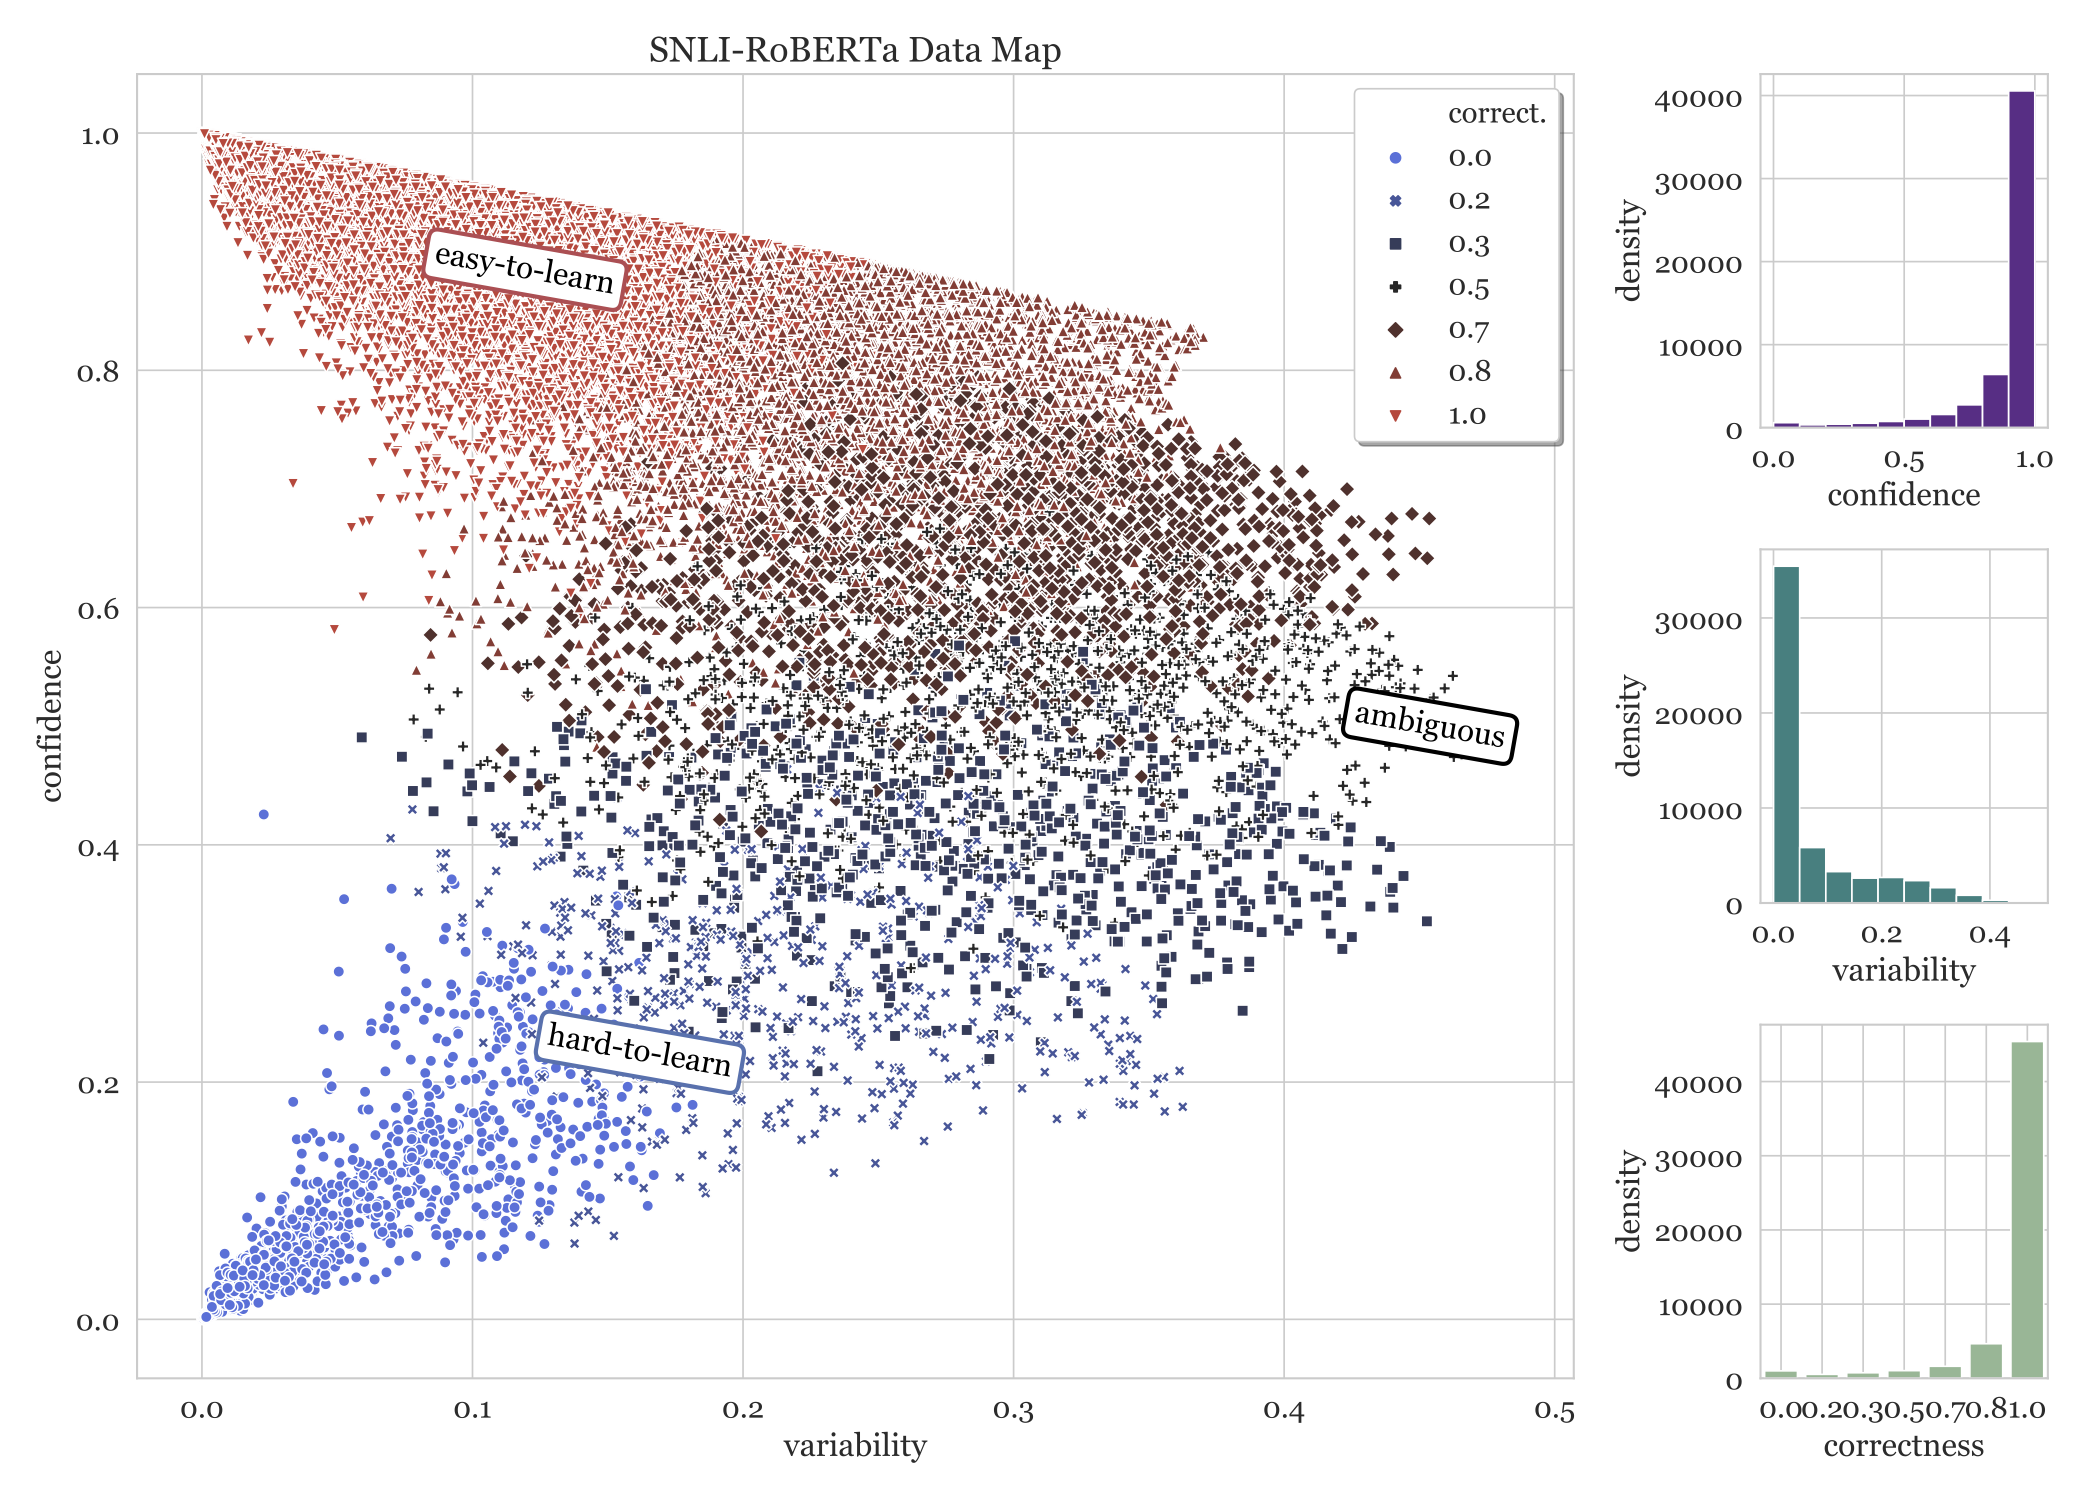

In [18]:
from PIL import Image
Image.open("SNLI_RoBERTa.png")

For the first try I am going to follow the text and set the first boundary at 0.2 variability. The text says that both easy to learn and hard to learn show low variability whereas the ambiguous category is defined by its high variabilty. After the split on variability we can seperate easy and hard to learn by their correctness or confidence as both these variables would make a clean split between the groups.

In [33]:
variability_split = 0.25
correctness_split = 0.5

ambiguous = cartography_data[cartography_data['variability']>=variability_split]
easy_to_learn = cartography_data[(cartography_data['variability']<variability_split) & (cartography_data['correctness']>= correctness_split)] 
hard_to_learn = cartography_data[(cartography_data['variability']<variability_split) & (cartography_data['correctness']< correctness_split)] 
print("Ambiguous_data: ")
display(ambiguous)
print("Easy-to-learn: ")
display(easy_to_learn)
print("Hard-to-learn: ")
display(hard_to_learn)

print(f"The length of these splits: {len(ambiguous)+len(easy_to_learn)+len(hard_to_learn)} \nCompared to the full dataset {len(cartography_data)}")
print(f"Ambiguous set: {len(ambiguous)}\nEasy-to-learn: { len(easy_to_learn)}\nHard-to-learn: {len(hard_to_learn)}")

Ambiguous_data: 


,guid,index,confidence,variability,correctness
0,4446013212032,0,0.675678,0.301201,4
1,568940932410,1,0.843770,0.314807,5
2,4107496324431,2,0.864639,0.302112,5
4,6041167176312,4,0.653921,0.342495,4
8,4702844775410,8,0.858132,0.291497,5
...,...,...,...,...,...
549269,49278853411,549269,0.608866,0.437465,4
549301,210625425012,549301,0.659166,0.278851,4
549307,1403414927231,549307,0.646001,0.397951,4
549313,124390903452,549313,0.748586,0.339735,5


Easy-to-learn: 


,guid,index,confidence,variability,correctness
3,151853983012,3,0.872000,0.154454,6
5,578644583112,5,0.914985,0.165604,6
6,1355450069312,6,0.877515,0.248021,5
7,6569938885142,7,0.846218,0.192261,6
11,7988586396112,11,0.846008,0.107973,6
...,...,...,...,...,...
549362,5732659631411,549362,0.997563,0.002784,6
549363,3920105265011,549363,0.994982,0.010534,6
549364,6888801884010,549364,0.936412,0.080370,6
549365,189022647122,549365,0.777098,0.066182,6


Hard-to-learn: 


,guid,index,confidence,variability,correctness
214,1350948838352,214,0.130368,0.112338,0
221,2845913338012,221,0.067726,0.113996,0
228,2696045361312,228,0.061916,0.115841,0
235,3041645937011,235,0.065837,0.114424,0
249,4618622923010,249,0.166810,0.098362,0
...,...,...,...,...,...
549000,6562993653212,549000,0.304139,0.095484,0
549035,6599202227022,549035,0.245575,0.133594,0
549084,5416571561312,549084,0.228564,0.089612,0
549215,146479462212,549215,0.111141,0.033047,0


The length of these splits: 549169 
Compared to the full dataset 549169
Ambiguous set: 44419
Easy-to-learn: 494586
Hard-to-learn: 10164


The hard to learn category is by far the smallest using this method. The easy to learn is the largest, but with the distribution of the corerctness that is to be expected.\
Variability 0.2 and correctness 0.5:
- Ambiguous set: 68033
- Easy-to-learn: 470974
- Hard-to-learn: 10162

Variability 0.2 and correctness 0.5:
- Ambiguous set: 44419
- Easy-to-learn: 494586
- Hard-to-learn: 10164

Variability 0.3 and correctness 0.5:
- Ambiguous set: 24563
- Easy-to-learn: 514442
- Hard-to-learn: 10164

Now I'll try only using the correctness to seperate the different categories as that seems to also show some seperation in the graph.

In [38]:
"""
their function to calculate the fraction for the correctness
lambda d: d.correctness / d.correctness.max())
which means that the fraction means:
so 0.3 --> 2
and 0.7 --> 4
""" 
correctness_low = 2
correctness_high = 5

ambiguous = cartography_data[(cartography_data['correctness']>=correctness_low) & ((cartography_data['correctness']<= correctness_high))]
easy_to_learn = cartography_data[(cartography_data['correctness']>correctness_high)] 
hard_to_learn = cartography_data[(cartography_data['correctness']<correctness_low)] 
print("Ambiguous_data: ")
display(ambiguous)
print("Easy-to-learn: ")
display(easy_to_learn)
print("Hard-to-learn: ")
display(hard_to_learn)

print(f"The length of these splits: {len(ambiguous)+len(easy_to_learn)+len(hard_to_learn)} \nCompared to the full dataset {len(cartography_data)}")
print(f"Ambiguous set: {len(ambiguous)}\nEasy-to-learn: { len(easy_to_learn)}\nHard-to-learn: {len(hard_to_learn)}")

Ambiguous_data: 


,guid,index,confidence,variability,correctness
0,4446013212032,0,0.675678,0.301201,4
1,568940932410,1,0.843770,0.314807,5
2,4107496324431,2,0.864639,0.302112,5
4,6041167176312,4,0.653921,0.342495,4
6,1355450069312,6,0.877515,0.248021,5
...,...,...,...,...,...
549301,210625425012,549301,0.659166,0.278851,4
549307,1403414927231,549307,0.646001,0.397951,4
549313,124390903452,549313,0.748586,0.339735,5
549320,4138236406312,549320,0.415983,0.207780,2


Easy-to-learn: 


,guid,index,confidence,variability,correctness
3,151853983012,3,0.872000,0.154454,6
5,578644583112,5,0.914985,0.165604,6
7,6569938885142,7,0.846218,0.192261,6
11,7988586396112,11,0.846008,0.107973,6
13,4698726564312,13,0.928658,0.150804,6
...,...,...,...,...,...
549362,5732659631411,549362,0.997563,0.002784,6
549363,3920105265011,549363,0.994982,0.010534,6
549364,6888801884010,549364,0.936412,0.080370,6
549365,189022647122,549365,0.777098,0.066182,6


Hard-to-learn: 


,guid,index,confidence,variability,correctness
29,1349095760122,29,0.138481,0.227736,1
56,7053876907410,56,0.228720,0.173827,1
92,4438629444410,92,0.323941,0.121381,1
109,7757245162342,109,0.211771,0.132324,1
126,1187077747412,126,0.145346,0.168433,1
...,...,...,...,...,...
549084,5416571561312,549084,0.228564,0.089612,0
549182,22930048210,549182,0.250073,0.184685,1
549215,146479462212,549215,0.111141,0.033047,0
549252,2073756099412,549252,0.300249,0.266519,1


The length of these splits: 549169 
Compared to the full dataset 549169
Ambiguous set: 75932
Easy-to-learn: 457495
Hard-to-learn: 15742


Splits on 2 and 4: 
- Ambiguous set: 34337
- Easy-to-learn: 499090
- Hard-to-learn: 15742

Splits on 2 and 5: 
- Ambiguous set: 75932
- Easy-to-learn: 457495
- Hard-to-learn: 15742

All these splits can be used to create the different categories, i think we can take any depending on how we want to pick from the different categories.\

I think we should try the curricula:
- Most extreme ambiguous examples --> might not train properly as paper suggested
- Hardest examples --> might just leave an incorrect model
- Mix

The paper showed that < 25% of the ambiguous training subset of the Winogrande was not enough to train on, so I want to check if that is also the case for SNLI.\
Other than that I just want to train a few mixed category curricula to see if mixing has any influence, we'll report whatever is interesting. That at least gives something to talk about even if nothing greatly outperforms the test set.